# Analyzing the Results of our (small) Dataset Excel Notebook

## Analyze object detection results and the different possible categories

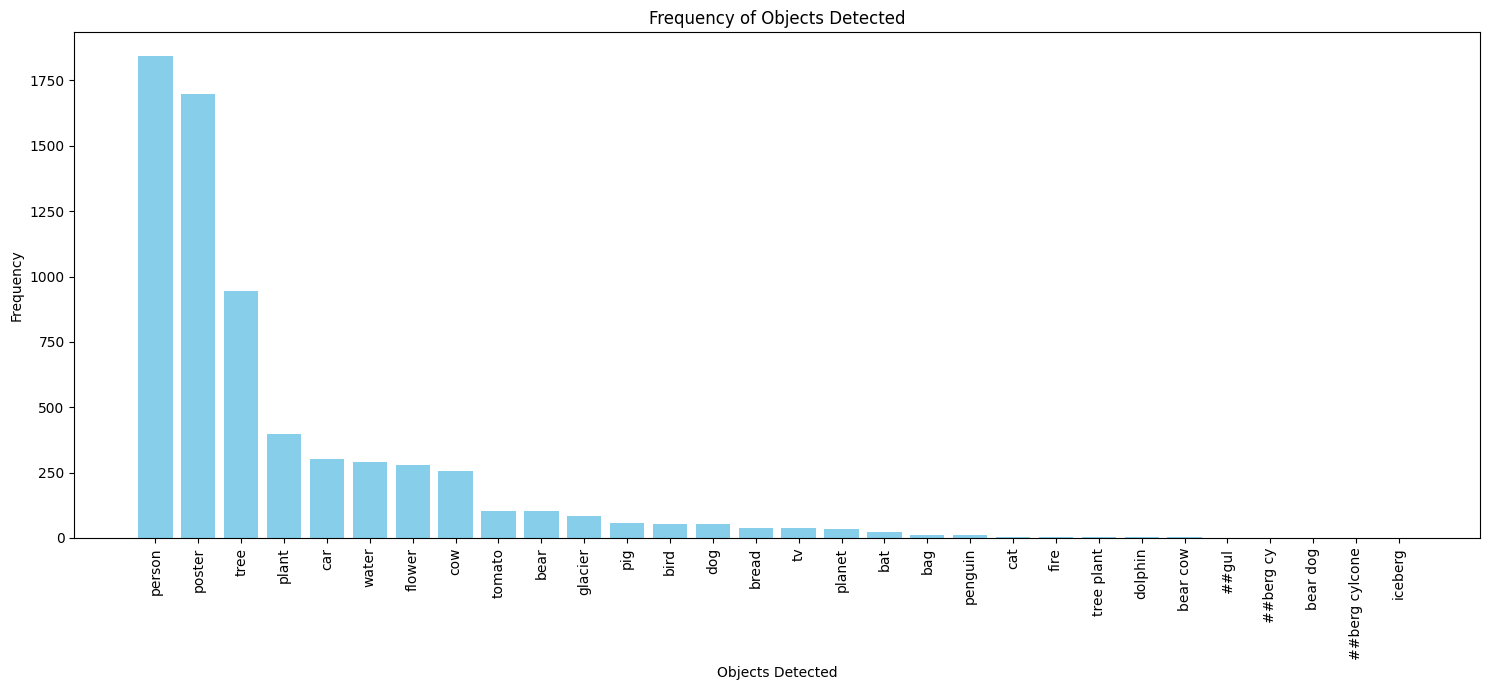

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

file_path = 'result_server_dino.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

all_results = df['object_detection_results'].dropna().str.split(',').sum() # split the object string
flat_results = [item.strip() for item in all_results if item.strip()]
value_counts = Counter(flat_results)

sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))

labels = []
counts = []

for key, count in sorted_value_counts.items():
    labels.append(key)
    counts.append(count)
    

# Plot the data
plt.figure(figsize=(15, 7))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Objects Detected')
plt.ylabel('Frequency')
plt.title('Frequency of Objects Detected')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Analyze confidence of the text results - any patterns?

Highest confidence in the dataset: 0.951306939125061
Lowest Confidence in the dataset: 0.7337170839309692
Average confidence: 0.8921964510599774

image_name                                         id_1143477043419582464_2019-06-25.jpg
object_detection_results                                                        poster, 
aisak_description                         united nations human rights special procedures
moondream_description                  The image features the logo of the United Nati...
gemini_description                                                                   NaN
facial_emotion                                                                       ---
text_similarity_semantic                                                        0.733717
text_similarity_semantic_expression                                                  low
labels                                                                               NaN
bounding_boxes                         [    0.49993  

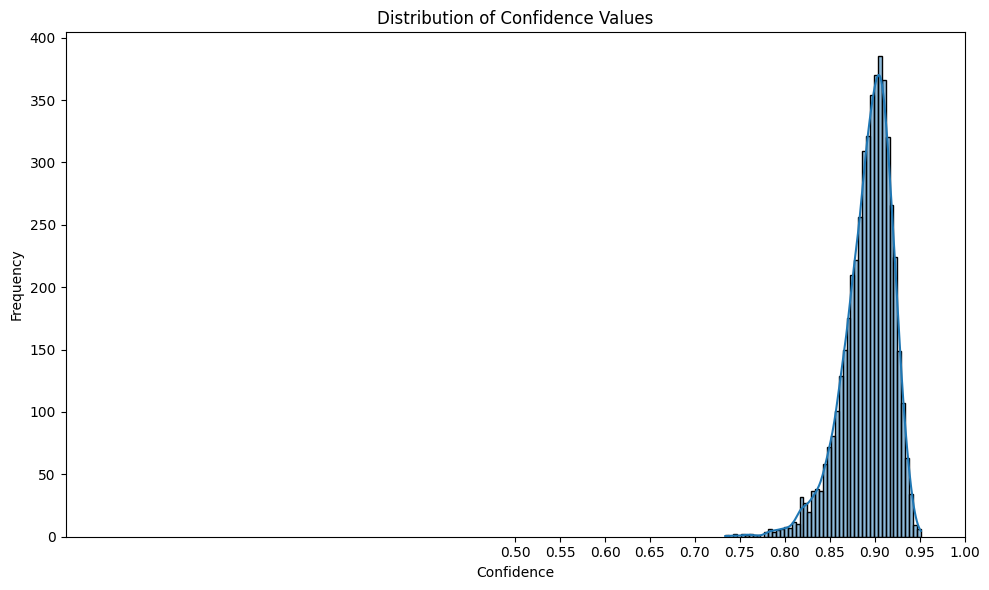

In [5]:
import seaborn as sns

bugfree_df = df[df['text_similarity_semantic'] > 0.5] ## small problem so far: gemini does not have 

print("Highest confidence in the dataset: " + str(bugfree_df['text_similarity_semantic'].max()))
print("Lowest Confidence in the dataset: " + str(bugfree_df['text_similarity_semantic'].min()))
print("Average confidence: " + str(bugfree_df['text_similarity_semantic'].mean()))

print()

print(df.loc[df['text_similarity_semantic'].idxmin()])

min_confidence_entries = df.nsmallest(50, 'text_similarity_semantic')
print(min_confidence_entries)


plt.figure(figsize=(10, 6))
sns.histplot(df['text_similarity_semantic'], bins=50, kde=True)

# Set labels and title
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence Values')

# Set x-axis limits and ticks
plt.xlim(0, 1.0)
plt.xticks([i/100 for i in range(50, 101, 5)])

# Show plot
plt.tight_layout()
plt.show()


## Analyzing Further - Moondream v2, Gemini and short text description

- the short text description tends to use irrational words like 'arafed' way too much, yet still feels useful in most cases to get a short impression over the image
- gemini tends to give the best results from all models, not being prone to errors in most cases
- gemini detects celebrities like donald trump, allowing filters to also filter for those
- moondreamv2 tends to sometimes fail and repeat the same words several times - the cause of this is unknown (most likely hallucinations)